## Method Of Prediction | M507A
### Fiona Amuda | GH1030807
### Final Assessment: Multiclass Image Classification Task Using CNN


## 1 Introduction
The car manufacturing company that I work for is looking to launch a self-driving car. The cars will have a sophisticated computer vision system that can identify different objects on the road. It should be able to identify the different cars on the road while maintaining a distance behind the cars. For safety, break when the object is not a car.  
As a data scientist I have been allocated an image classification task. Image classification is the starting point, and the process will advance to object detection as phase two. Training such a system requires a diverse huge data set.
### 1.1 Problem Statement 
The company profit margins are droping, to compete and meet the raising consumer demands, they are introducing a new product 'self-driving car' that is estimated to bring a 20% profit increase in the first year alone. 
### 1.2 Proposed Solution 
For the first phase of this project, which is the machine learning pipeline I will create, I will use public available data CIFAR10 to train a model that the company can later use as a pre-trained model and leverage on transfer learning. I will use convolutional neuro network for deep learning and TensorFlow as my framework. Since the computer vision system requires a huge amount of data, transfer learning will help with this challenge. The pre-trained model would have learned how to detect patterns from the public available data. By fine tuning the pre-trained model we transfer the learnings to the company’s data without necessarily requiring a huge amount of the data. 
### 1.3 Data Collection Process
The starting phase of data collection is to use public available data CIFAR10 for this pipeline, then CIFAR100 and a few more public road datasets like Cityscapes. The company will then have partnerships with research institutions that can give access to diverse labeled data from real-world driving conditions. With the rise in data generation technology, the company is also looking to use synthetic data generated from tools like CARLA (Car Learning to Act) and SUMO (Simulation of Urban Mobility). And lastly, they will collect data from public cameras.

## 2 Data Exploration
CIFAR-10's is a publicly available dataset owned by Canadian Institute for Advanced Research (CIFAR). Its simplicity makes it a good dataset to use for benchmarking this image classification task. It contains colored images such as cars, animals, and birds in 10 different classes. The image size is 32x32. The dataset is clean and ready for use, although because I will be loading it from hugging face I will need to check for any unexpected modifications, incomplete downloads or file errors. The dataset appears to have a low resolution which might potentially cause some noise. Some classes may appear similar or ambiguous due to the low resolution.

To evaluate the model performance on CNN, I will be using accuracy to evaluate overall performance. Because the model’s intended purpose is to classify cars correctly to calculate the distance between and also break when the object identified is not a car, some imbalance may exist when introduced to real images hence precision and recall are important matrices. I will also use confusion matrix to understand which classes are being misclassified.

### 2.1 Importing Libraries That Support My Code
TensorFlow library will be the deep learning framework I use for model training. To handle arrays and numerical operations I will use numpy. To visualize some performance and data distribution I will use matplotlib and seaborn. To load the dataset, I will use dataset.load_dataset and pandas for data frame representation of the data. I will process the data further by splitting it to test, validation and train which will require the use of sklearn.model_selection.train_test_split. To encode the data tensorflow.keras.utils.to_categorical. tensorflow.keras.callbacks.EarlyStopping will be used during training to monitor and prevent overfitting, training process stops when performance stops improving.

In [82]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### 2.2 Load the dataset from hugging face

In [8]:
dataset = load_dataset("cifar10")

### 2.3 Confirming the dataset shape
The dataset has alreday been devided into traing and test set. For this pipeline i will divide the data further and allocate a validation set from the training set. The dataset has 60,000 rows in total, and two columns.

In [10]:
dataset.shape

{'train': (50000, 2), 'test': (10000, 2)}

### 2.4 Exploring a sample of the data
The dataset has already been divided into train and test set. For this pipeline i will divide the data further and allocate a validation set from the training set. The dataset has 60,000 rows in total, and two columns

In [12]:
samples = dataset['train']
for i in range(5):
    print(f"Sample {i}:")
    print(samples[i])  
    print()

Sample 0:
{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x12B1E9DFA40>, 'label': 0}

Sample 1:
{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x12B1E9DFAA0>, 'label': 6}

Sample 2:
{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x12B1E9DF7D0>, 'label': 0}

Sample 3:
{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x12B1E9DF380>, 'label': 2}

Sample 4:
{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x12B1E9DFA10>, 'label': 7}



### 2.5 Confirmimg the allocated class names
There are 10 labels as per the below list 

In [14]:
pd.DataFrame(dataset['train'].features['label'].names)

,0
0,airplane
1,automobile
2,bird
3,cat
4,deer
5,dog
6,frog
7,horse
8,ship
9,truck


### 2.6 Meta data
1. Dataset is in a dictionary format 
2. The features are under key 'img' and labels under 'label'
3. The lablels are numerical, no encoding required
4. Image sizes are 32x32 I will need to confirm if there all the same dimension before splitting my data
5. This dataset has coloured images hence a 3 dimension 

## 3.0 Data Visualization 
A visual representation of a sample of the of the image and table plot of first 25 images. Some graphs on the data distribution to help with further analysis.

### 3.1 Image Sample 
At index 23 of the training dataset the image is of a bird. The below graph is mapped on a 32x32 on the x and y axis the colour intensity as shown on the horizontal bar is from 0 to 255

In [18]:
sample = dataset['train'][23]
image = sample['img'] 
label = sample['label']

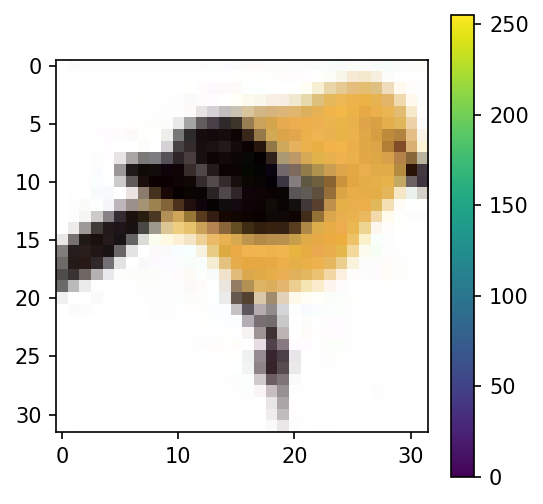

In [19]:
image = np.array(image, dtype=np.uint8)
plt.figure(figsize=(4,4), dpi=150)
plt.imshow(image, interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.show()

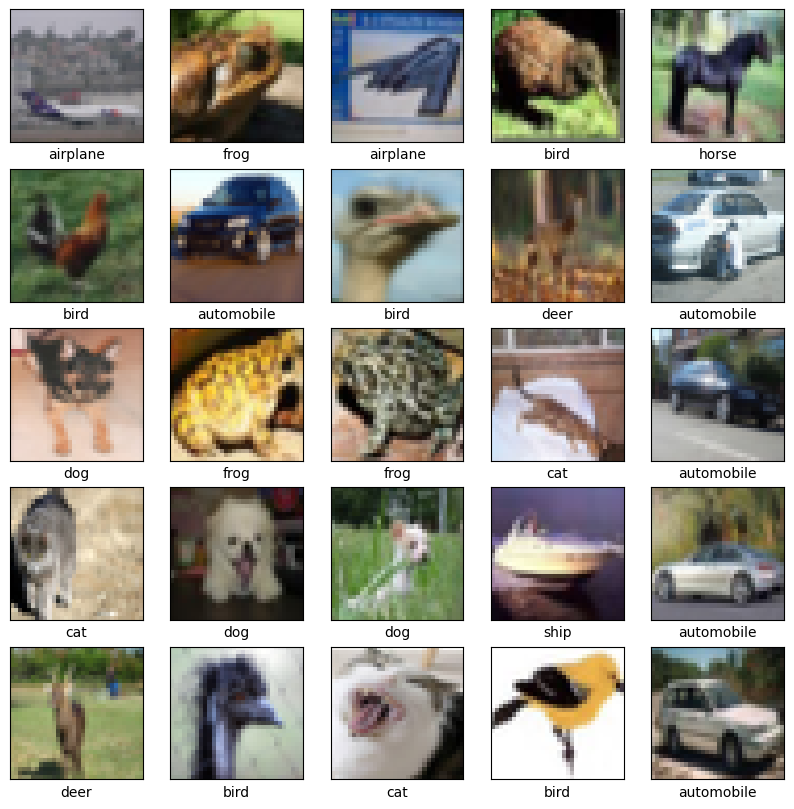

In [20]:

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = dataset['train'][i]['img']  
    label = dataset['train'][i]['label']  
    
    plt.imshow(image)
    plt.xticks([])  
    plt.yticks([])  
    plt.grid(False) 
    
    plt.xlabel(class_names[label]) 

plt.show()

### 3.2 Data Distribution
1. From the training set each class has been assigned 5,000 images
2. From the test set each class has been assigned 1,000 images
3. Data allocated in the 10 classes is well balanced which is important to ensure there is no bias, and eliminates the chances of a model learning one particular class very well and not the rest. 

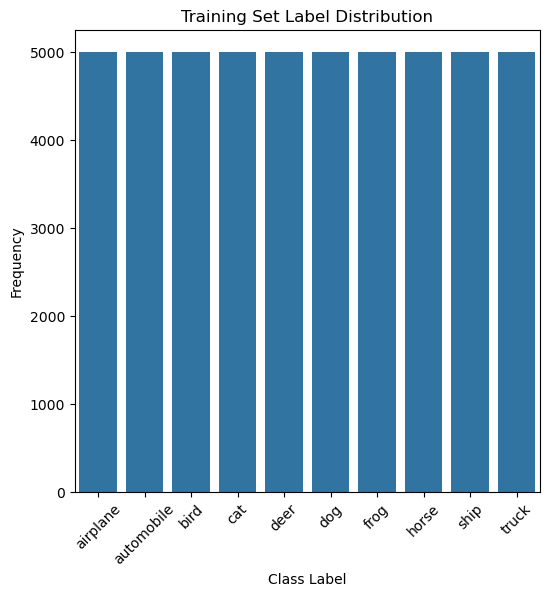

In [22]:
labels = np.array(dataset['train']['label'])
plt.figure(figsize=(6, 6))
sns.countplot(x=labels)
plt.title('Training Set Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

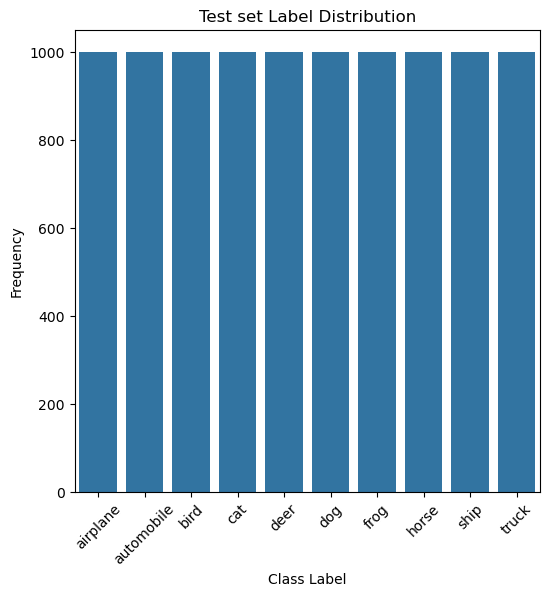

In [23]:
labels = np.array(dataset['test']['label'])
plt.figure(figsize=(6, 6))
sns.countplot(x=labels)
plt.title('Test set Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.show()

## 4.0 Data Cleaning 
Verified is there were any rows with missing values, images of different sizes or unknown format.
The dataset is clean and ready to use

In [25]:
for i, corrupted in enumerate(dataset['train']):
    if corrupted['img'] is None:
        print(f"Corrupted image at index {i}")
else:
    print("Checked Results: No corrupted data")

Checked Results: No corrupted data


In [26]:
for i, corrupted in enumerate(dataset['test']):
    if corrupted['img'] is None:
        print(f"Corrupted image at index {i}")
else:
    print("Checked Results: No corrupted data")

Checked Results: No corrupted data


In [27]:
for i, size in enumerate(dataset['train']):
    img = size ['img']
    if img.size != (32, 32):
        print(f"Invalid image size at index {i}: {img.size}")
else:
    print("Checked Results: No Invalid Image Size")

Checked Results: No Invalid Image Size


In [28]:
for i, size in enumerate(dataset['test']):
    img = size ['img']
    if img.size != (32, 32):
        print(f"Invalid image size at index {i}: {img.size}")
else:
    print("Checked Results: No Invalid Image Size")

Checked Results: No Invalid Image Size


## 5.0 Spliting the data
The dataset from hugging face is alreday split into train and test. I will assign a varaible for each set. Since the data is in dictionary formart will convert it to a numpy arrays. The images in the 'img' key and the classes in the 'label' key are now separated into seprate arrays. I will slip the training data into 20% validation data and 80% remaining will be the training data. 

In [30]:
train_data = dataset['train']
test_data = dataset['test']

In [31]:
x_train = np.array([example['img'] for example in train_data])
y_train = np.array([example['label'] for example in train_data])
x_test = np.array([example['img'] for example in test_data])
y_test = np.array([example['label'] for example in test_data])

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## 6.0 Preprocessing 
The pixel values have to be converted into (0,1)/Normalized hence i will divide the images by 255. The labels encoded, hence using to_categorical. 

In [33]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

In [34]:
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Confirming the shape

In [36]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 10)
x_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


## 7.0 Best Model

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(32, 32, 3)),
    tf.keras.layers.Normalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='leaky_relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='leaky_relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='leaky_relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(10, activation='softmax')   
])

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 32, 32, 3)           │               7 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 486,801 (1.86 MB)

 Trainable params: 486,794 (1.86 MB)

 Non-trainable params: 7 (32.00 B)

In [40]:

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001,decay_steps=100000,decay_rate=0.96,staircase=True)

In [41]:

callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [42]:

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),loss='categorical_crossentropy', metrics=['accuracy','precision', 'recall'])

In [43]:

history = model.fit(x_train, y_train, batch_size=128, epochs=50, callbacks=[callback], validation_data=(x_val, y_val))

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 53s 158ms/step - accuracy: 0.3402 - loss: 1.7870 - precision: 0.6040 - recall: 0.1084 - val_accuracy: 0.5595 - val_loss: 1.2664 - val_precision: 0.7401 - val_recall: 0.3435
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.5707 - loss: 1.2019 - precision: 0.7359 - recall: 0.3923 - val_accuracy: 0.6397 - val_loss: 1.0275 - val_precision: 0.7816 - val_recall: 0.4939
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 122ms/step - accuracy: 0.6369 - loss: 1.0229 - precision: 0.7684 - recall: 0.5050 - val_accuracy: 0.6644 - val_loss: 0.9460 - val_precision: 0.7938 - val_recall: 0.5481
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 121ms/step - accuracy: 0.6748 - loss: 0.9192 - precision: 0.7852 - recall: 0.5637 - val_accuracy: 0.6991 - val_loss: 0.8676 - val_precision: 0.7996 - val_recall: 0.5931
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 126ms/step - accuracy: 0.7066 - loss: 0.8375 - precision: 0.8062 - recall: 0.6089 - val_accuracy: 0.7146

## 8.0 Report On Experiments

In [55]:
best_model_test = {
    "Tests": [
        "Test 1", "Test 2", "Test 3", "Test 4", "Test 5", 
        "Test 6", "Test 7", "Test 8", "Test 9", "Test 10", "Test 11"
    ],
    "Experiments": [
        "Best model leaky_relu function",
        "Relu as the activation function",
        "Batch normalization after conv2d",
        "No normalization after input layer",
        "No drop-out layer",
        "No batch size",
        "No learning rate",
        "Reduced filters, conv2d layers",
        "Reduced neurons, dense layer",
        "With 2 conv2d layers",
        "With data augmentation"
    ],
    "Validation Accuracy Impact": [
        "Validation accuracy: 76%",
        "dropped to 75%, went back to leaky_relu",
        "dropped to 70%, slower convergence",
        "dropped to 74% loss of standerdized input",
        "dropped to 70% poor generalization",
        "dropped to 73% unstable training",
        "dropped to 74% converging too slowly",
        "dropped to 72% poor capture of features",
        "dropped to 75% low capacity to learn",
        "dropped to 72% poor capture of features",
        "dropped to 73% too much variability"
    ]
}

results_table = pd.DataFrame(best_model_test)
results_table


,Tests,Experiments,Validation Accuracy Impact
0,Test 1,Best model leaky_relu function,Validation accuracy: 76%
1,Test 2,Relu as the activation function,"dropped to 75%, went back to leaky_relu"
2,Test 3,Batch normalization after conv2d,"dropped to 70%, slower convergence"
3,Test 4,No normalization after input layer,dropped to 74% loss of standerdized input
4,Test 5,No drop-out layer,dropped to 70% poor generalization
5,Test 6,No batch size,dropped to 73% unstable training
6,Test 7,No learning rate,dropped to 74% converging too slowly
7,Test 8,"Reduced filters, conv2d layers",dropped to 72% poor capture of features
8,Test 9,"Reduced neurons, dense layer",dropped to 75% low capacity to learn
9,Test 10,With 2 conv2d layers,dropped to 72% poor capture of features


## 9.0 Model Evaluation

### 9.1 Training and Validation Data Scores
The model performance on training data is quite good but does not perform well enough when it comes to generalization as there is a 9% difference from the validation score. With a training accuracy of 87% this suggests the model learned well the patterns from training data. 89% precision indicates the model's strength in predicting true positives. This is also indicated by the 84% recall. There is indication of overfitting from the accuracy, recall and precision gaps. Though the percentage difference is not too high this could still be improved.

In [95]:
evaluation_results = {
    'Metrices': ['Loss', 'Validation_Loss', 'Accuracy', 'Validation_Accuracy', 'Precision', 'Validation_Precision', 'Recall', 'Validation_Recall'],
    'Results %': [
        history.history['loss'][-1]*100,  
        history.history['val_loss'][-1]*100,  
        history.history['accuracy'][-1]*100,  
        history.history['val_accuracy'][-1]*100,  
        history.history.get('precision',[])[-1]*100 if 'precision' in history.history else None, 
        history.history.get('val_precision',[])[-1]*100 if 'val_precision' in history.history else None, 
        history.history.get('recall', [])[-1]*100 if 'recall' in history.history else None,  
        history.history.get('val_recall',[])[-1]*100 if 'val_recall' in history.history else None, 
    ]
}
evaluation_results_df = pd.DataFrame(evaluation_results)
print(evaluation_results_df)

               Metrices  Results %
0                  Loss  36.240685
1       Validation_Loss  79.291296
2              Accuracy  87.087500
3   Validation_Accuracy  76.120001
4             Precision  89.800739
5  Validation_Precision  79.625219
6                Recall  84.612501
7     Validation_Recall  73.509997


### 9.2 Test Data Scores
Given that we had 1000 labels for each class the confusion matrix indicates that the model is performing quite well as most of the correct predictions on the diagonal entries are above 700. The false positives are quite small, the model is good in not misclassifying. The classes with common misclassifications are 5(dog) which the model often sees as 3(cat).

In [86]:
test_results = model.evaluate(x_test, y_test, return_dict=True)
print(f"Percentage Loss: {test_results['loss']*100}")
print(f"Percentage Accuracy: {test_results['accuracy']*100}")
print(f"Percentage Precision: {test_results['precision']*100}")
print(f"Percentage Recall: {test_results['recall']*100}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7768 - loss: 0.6826 - precision: 0.8202 - recall: 0.7440
Percentage Loss: 70.33061981201172
Percentage Accuracy: 77.32999920845032
Percentage Precision: 81.76893591880798
Percentage Recall: 73.96000027656555


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


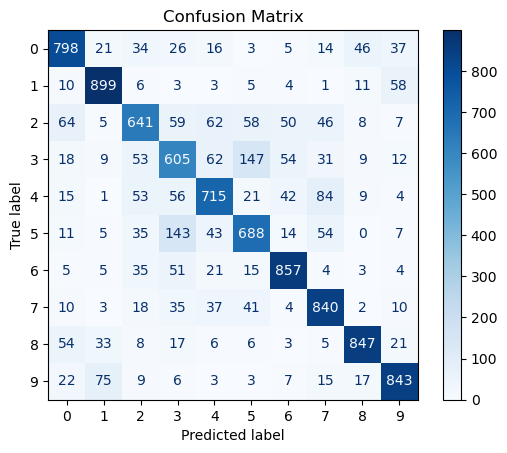

In [88]:
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
test_cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=range(10))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

## 10.0 Conclusion
CIFAR10 inherent characteristics have contributed both as a strength and weakness to the model performance. The small image sizes have contributed to lowering the precision and recall scores. With small image sizes the features are not easily distinguishable. Some classes have overlapping features, hence the gap between training and validation as the model is struggling to generalize hence overfitting. With diverse images with background, angels and lighting variation there is a need for more training and test images. The good balance in data allocation for the 10 classes contributed to good precision and recall scores, which was an important task the company. 
The model’s general performance is good, 87% accuracy indicates it learned the patterns quite well, 89% precision shows that the model predicts the correct class mostly which is a good thing for a self-driven car. 
I would recommend that the company uses the model for transfer learning tasks. Freez the lower layers and only train the higher layers on the new dataset.
